In [82]:
# import all packages and set plots to be embedded inline
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

Task 1: Posing an interesting analytical question relevant to the chosen dataset

Which customer segment should we focus more on in order to improve sales while not raising costs very much, leading to increased profit margins?.

Load in the data and specify the encoding

In [3]:
df = pd.read_csv("superstore.csv", encoding='latin1')
print(df.shape)
df.sample(10)

(9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
8445,8446,CA-2017-125451,10/23/2017,10/24/2017,First Class,AH-10075,Adam Hart,Corporate,United States,Cranston,...,2920,East,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,240.744,4,0.3,-13.7568
5218,5219,CA-2017-167080,6/10/2017,6/14/2017,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,New York City,...,10011,East,OFF-AR-10001868,Office Supplies,Art,Prang Dustless Chalk Sticks,8.400,5,0.0,4.2000
2094,2095,US-2015-164357,11/25/2015,11/29/2015,Standard Class,SF-20065,Sandra Flanagan,Consumer,United States,Wilmington,...,28403,South,OFF-AR-10001177,Office Supplies,Art,Newell 349,13.120,5,0.2,1.4760
668,669,CA-2014-156314,12/24/2014,12/26/2014,First Class,RP-19390,Resi Pölking,Consumer,United States,Cleveland,...,44105,East,FUR-FU-10003096,Furniture,Furnishings,"Master Giant Foot Doorstop, Safety Yellow",30.360,5,0.2,8.7285
7946,7947,CA-2017-134194,12/25/2017,1/1/2018,Standard Class,GA-14725,Guy Armstrong,Consumer,United States,Dallas,...,75081,Central,OFF-BI-10001116,Office Supplies,Binders,"Wilson Jones 1"" Hanging DublLock Ring Binders",3.168,3,0.8,-5.0688
2363,2364,US-2016-108637,3/13/2016,3/18/2016,Standard Class,AB-10060,Adam Bellavance,Home Office,United States,Waynesboro,...,22980,South,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",127.880,2,0.0,40.9216
7723,7724,CA-2015-139374,9/10/2015,9/14/2015,Standard Class,AR-10345,Alex Russell,Corporate,United States,Austin,...,78745,Central,FUR-CH-10003981,Furniture,Chairs,Global Commerce Series Low-Back Swivel/Tilt Ch...,179.886,1,0.3,-2.5698
8884,8885,CA-2014-107398,8/25/2014,8/30/2014,Standard Class,BS-11590,Brendan Sweed,Corporate,United States,Columbus,...,43229,East,OFF-BI-10001982,Office Supplies,Binders,Wilson Jones Custom Binder Spines & Labels,6.528,4,0.7,-4.5696
7913,7914,US-2017-105697,8/25/2017,8/27/2017,First Class,JE-15715,Joe Elijah,Consumer,United States,Cleveland,...,44105,East,OFF-ST-10003996,Office Supplies,Storage,"Letter/Legal File Tote with Clear Snap-On Lid,...",25.696,2,0.2,1.9272
3661,3662,CA-2016-155005,6/13/2016,6/15/2016,Second Class,SC-20050,Sample Company A,Home Office,United States,Jackson,...,49201,Central,TEC-PH-10003484,Technology,Phones,Ooma Telo VoIP Home Phone System,377.970,3,0.0,94.4925


Note:

The encoding must be specified or esle the code will throw an error like this utf-8' codec can't decode byte 0xa0 in position 2944: invalid start byte

Another method is to re-encode the file as utf-8 and save for re-usability buy running the cell below

In [ ]:
'''
import codecs
BLOCKSIZE = 1048576 # or some other, desired size in bytes
with codecs.open("Superstore.csv", "r", encoding='cp1252') as sourceFile:
    # Save as new file 
    with codecs.open("./Superstore2.csv", "w", "utf-8") as targetFile:
        while True:
            contents = sourceFile.read(BLOCKSIZE)
            if not contents:
                break
            targetFile.write(contents)
'''

Task-2.1: Exploratory Data Analysis

In [4]:
## See how column names were written
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

The columns' naming convention doesn't follow the best practice. Also, having spaces in between column names makes it difficult to be referenced.

In [5]:
## Check for duplicate records
df.duplicated().sum()

0

In [6]:
## Check for total unique and duplicate order id to know if customers buy more than a single product at a time
print(f"Unique order id: {df['Order ID'].nunique()}")
print(f"Duplicate order id: {df['Order ID'].duplicated().sum()}")

Unique order id: 5009
Duplicate order id: 4985


In [7]:
## Check for missing values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
## Have overview of the data; total observations and features, missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

There are issues with data types, and will be corrected later

In [9]:
## View columns with the object data type only
df.select_dtypes("object").head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System


In [10]:
## Seems `Country` has only one unique value
df["Country"].unique()

array(['United States'], dtype=object)

In [11]:
## Other columns like 'Ship Mode', 'Segment', and 'Region' seem to have small number of unique values

print(f"Regions: {df['Region'].unique()}")
print(f"Segments: {df['Segment'].unique()}")
print(f"Ship Modes: {df['Ship Mode'].unique()}")

Regions: ['South' 'West' 'Central' 'East']
Segments: ['Consumer' 'Corporate' 'Home Office']
Ship Modes: ['Second Class' 'Standard Class' 'First Class' 'Same Day']


This is to check for categorical variables with either one unique value like "Counrty" or too many unique values like "City". Both are not good for analysis unless it is recategorized. It is best when a feature has good unique values.

In [12]:
## generate descriptive statistics
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


A key observation here is seeing a high discount, as high as 0.8 and a negative profit, which may be due to the discount. I would explore more...I hypothesized that they must have been used for marketing purposes.

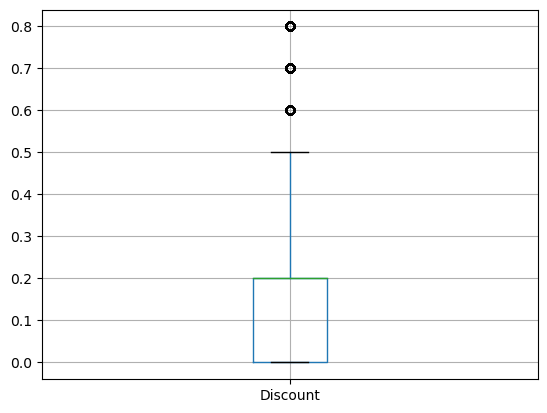

In [13]:
## Check the distribution of profit

df.boxplot(column = ["Discount"]);

In [14]:
## count the number of occurence for each discount
df.Discount.value_counts().sort_index()

0.00    4798
0.10      94
0.15      52
0.20    3657
0.30     227
0.32      27
0.40     206
0.45      11
0.50      66
0.60     138
0.70     418
0.80     300
Name: Discount, dtype: int64

In [15]:
## Calculate the total quantities for each discount
df[["Discount", "Quantity"]].groupby("Discount").sum()

,Quantity
Discount,
0.00,18267
0.10,373
0.15,198
0.20,13660
0.30,849
0.32,105
0.40,786
0.45,45
0.50,241


In [17]:
## Subset dataframe where profit is less than zero
df_low_profit = df.query("Profit < 0")
df_low_profit.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
14,15,US-2015-118983,11/22/2015,11/26/2015,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
15,16,US-2015-118983,11/22/2015,11/26/2015,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160
23,24,US-2017-156909,7/16/2017,7/18/2017,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
27,28,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
28,29,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,OFF-BI-10000474,Office Supplies,Binders,Avery Recycled Flexi-View Covers for Binding S...,9.6180,2,0.70,-7.0532
32,33,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,OFF-BI-10001525,Office Supplies,Binders,"Acco Pressboard Covers with Storage Hooks, 14 ...",6.8580,6,0.70,-5.7150
36,37,CA-2016-117590,12/8/2016,12/10/2016,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630
38,39,CA-2015-117415,12/27/2015,12/31/2015,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,77041,Central,FUR-BO-10002545,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",532.3992,3,0.32,-46.9764
39,40,CA-2015-117415,12/27/2015,12/31/2015,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,77041,Central,FUR-CH-10004218,Furniture,Chairs,"Global Fabric Manager's Chair, Dark Gray",212.0580,3,0.30,-15.1470


In [18]:
df_low_profit[["Discount", "Quantity"]].groupby("Discount").sum()

,Quantity
Discount,
0.10,14
0.15,50
0.20,1799
0.30,773
0.32,105
0.40,664
0.45,45
0.50,241
0.60,501


Increased discount is directly correlated to low profit. In fact, from 0.5 upward, all the products accumulated loss and no gain. They must have been used for promo. Thus, not be used in this analysis

Data Quality Issues To Deal With¶

Rename the columns

Correct data types

Drop extraneous column

Create other columns to be used for this analysis

Task 2.2: Data pre-processing (such as, data cleaning, data transformation etc.)

In [19]:
# replace spaces / hyphen with underscores and lowercase labels
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_").replace("-", "_"), inplace=True)

# Confirm changes
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [20]:
## Drop Extraneous Columns
to_drop = ["row_id", "country", "postal_code", "product_id", "ship_date", "customer_id"]
df_store = df.drop(columns = to_drop)

# Confirm changes
df_store.head()

,order_id,order_date,ship_mode,customer_name,segment,city,state,region,category,sub_category,product_name,sales,quantity,discount,profit
0,CA-2016-152156,11/8/2016,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [21]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9994 non-null   object 
 1   order_date     9994 non-null   object 
 2   ship_mode      9994 non-null   object 
 3   customer_name  9994 non-null   object 
 4   segment        9994 non-null   object 
 5   city           9994 non-null   object 
 6   state          9994 non-null   object 
 7   region         9994 non-null   object 
 8   category       9994 non-null   object 
 9   sub_category   9994 non-null   object 
 10  product_name   9994 non-null   object 
 11  sales          9994 non-null   float64
 12  quantity       9994 non-null   int64  
 13  discount       9994 non-null   float64
 14  profit         9994 non-null   float64
dtypes: float64(3), int64(1), object(11)
memory usage: 1.1+ MB


In [22]:
# Conver order_date ti datetime format
df_store["order_date"] = pd.to_datetime(df_store["order_date"])

# Create features that are useful for this analysis
df_store["year"] = df_store["order_date"].dt.year
df_store["month"] = df_store["order_date"].dt.month
df_store["date"] = df_store["order_date"].dt.day

# Confirm changes
df_store.head()

,order_id,order_date,ship_mode,customer_name,segment,city,state,region,category,sub_category,product_name,sales,quantity,discount,profit,year,month,date
0,CA-2016-152156,2016-11-08,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8
1,CA-2016-152156,2016-11-08,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8
2,CA-2016-138688,2016-06-12,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,12
3,US-2015-108966,2015-10-11,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,11
4,US-2015-108966,2015-10-11,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11


In [23]:
## Convert year, month and days into an ordinal variable

y_order = np.sort(df_store.year.unique())
m_order = list(range(1,13,1))
d_order = list(range(1,32,1))

y_order = pd.api.types.CategoricalDtype(ordered = True, categories = y_order)
m_order = pd.api.types.CategoricalDtype(ordered = True, categories = m_order)
d_order = pd.api.types.CategoricalDtype(ordered = True, categories = d_order)

df_store['year'] = df_store['year'].astype(y_order)
df_store['month'] = df_store['month'].astype(m_order)
df_store['date'] = df_store['date'].astype(d_order)

#confirm changes
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       9994 non-null   object        
 1   order_date     9994 non-null   datetime64[ns]
 2   ship_mode      9994 non-null   object        
 3   customer_name  9994 non-null   object        
 4   segment        9994 non-null   object        
 5   city           9994 non-null   object        
 6   state          9994 non-null   object        
 7   region         9994 non-null   object        
 8   category       9994 non-null   object        
 9   sub_category   9994 non-null   object        
 10  product_name   9994 non-null   object        
 11  sales          9994 non-null   float64       
 12  quantity       9994 non-null   int64         
 13  discount       9994 non-null   float64       
 14  profit         9994 non-null   float64       
 15  year           9994 n

In [24]:
## Sub-set only observations where the profit is greater than 0
mask = df_store["profit"] > 0
df_clean = df_store[mask]
print(df_clean.shape)
df_clean.head()

(8058, 18)


,order_id,order_date,ship_mode,customer_name,segment,city,state,region,category,sub_category,product_name,sales,quantity,discount,profit,year,month,date
0,CA-2016-152156,2016-11-08,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,2016,11,8
1,CA-2016-152156,2016-11-08,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,2016,11,8
2,CA-2016-138688,2016-06-12,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,2016,6,12
4,US-2015-108966,2015-10-11,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164,2015,10,11
5,CA-2014-115812,2014-06-09,Standard Class,Brosina Hoffman,Consumer,Los Angeles,California,West,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694,2014,6,9


In [25]:
## Check for the descriptive statistics
df_clean.describe()

,sales,quantity,discount,profit
count,8058.000000,8058.000000,8058.000000,8058.000000
mean,223.480623,3.794738,0.081044,54.917884
std,600.340641,2.244696,0.098884,213.713980
min,0.990000,1.000000,0.000000,0.062800
25%,17.940000,2.000000,0.000000,5.324550
50%,50.965000,3.000000,0.000000,13.317600
75%,191.976000,5.000000,0.200000,40.465550
max,17499.950000,14.000000,0.400000,8399.976000


However, I'll still use the df_store analysis so that I take into consideration money spent on advertisement or customer acquisition¶

Task 2.3: Statistics/computation-based data analytics

Task 2.4: Visualisations of the key results

I've joined these two tasks together to make it more explanatory, as two of them are complimentary

ASK:

Which is the most common customer segment

Is profit directly proportional to revenue

In [26]:
# Get the value count for each segment
segments = df_store['segment'].value_counts()
segments

Consumer       5191
Corporate      3020
Home Office    1783
Name: segment, dtype: int64

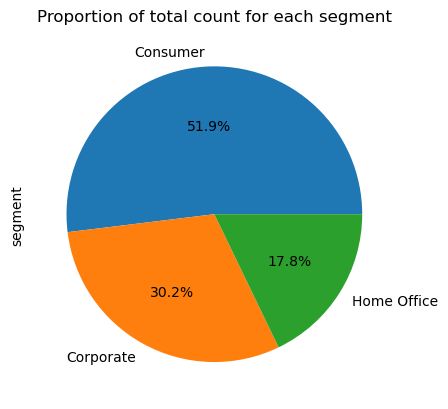

In [27]:
## Visialize their proportion
segments.plot.pie(autopct="%1.1f%%")
plt.title("Proportion of total count for each segment");

In [28]:
## Calculation the total sales for each segment

sales = df_store[["sales", "segment", "month"]]
df_sales = sales.groupby("segment").sum()
df_sales

,sales
segment,
Consumer,1.161401e+06
Corporate,7.061464e+05
Home Office,4.296531e+05


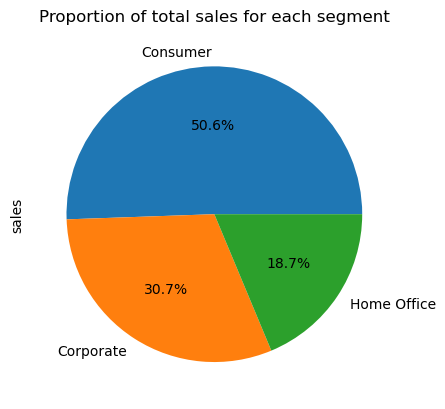

In [29]:
df_sales["sales"].plot.pie(autopct = "%1.1f%%")
plt.title("Proportion of total sales for each segment");

In [30]:
# Calculate the total profit for each segment
profit = df_store[["profit", "segment", "month"]]
df_profit = profit.groupby("segment").sum()
df_profit

,profit
segment,
Consumer,134119.2092
Corporate,91979.1340
Home Office,60298.6785


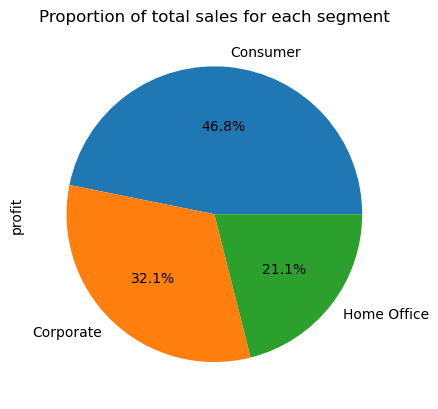

In [31]:
df_profit["profit"].plot.pie(autopct = "%1.1f%%")
plt.title("Proportion of total sales for each segment");

In [32]:
sales_profit = df_store[["sales", "profit", "segment", "month", "year"]]
df_sales_profit = sales_profit.groupby("segment").sum().reset_index()
df_sales_profit

,segment,sales,profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


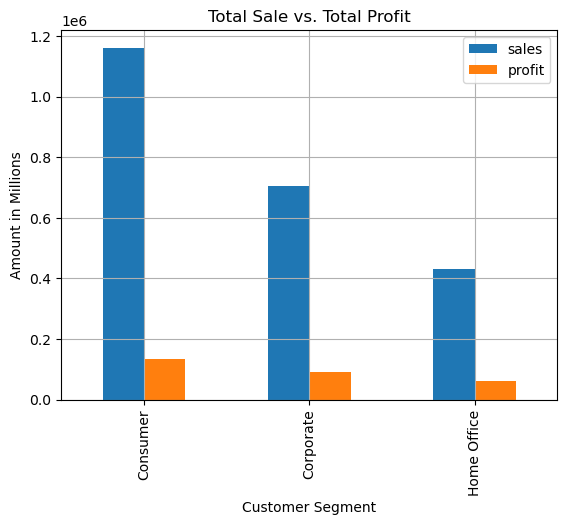

In [33]:
## View this in a bar chart
df_sales_profit.plot(kind = "bar", x = "segment", y = ["sales", "profit"]);
plt.grid()
plt.xlabel("Customer Segment")
plt.ylabel("Amount in Millions")
plt.title("Total Sale vs. Total Profit");

Finding: 

Casual buyers are the most common and account for more than half of the customer segment (51.9%), While customers with the label "Home office" are the least as they account for just 17.8% of the total buyers. However, something is interesting to note, the percentage decrease for the customer (casual buyers) segment moving from total count to sales and then to profit - the ultimate goal of any business. The percentage for the other two categories increases with a huge increment for the home office. Therefore, to increase profit, it will be a good strategy to convert casual buyers into home-office or corporate buyers.

ASK:

What has been the trend over the years?

How does an increase in sales affect profit for each segment?

In [34]:
## Group by segments and months
anual_sales_profit = sales_profit.groupby(["segment", "year"]).sum()

## split the rows using their index
consumer = anual_sales_profit.loc["Consumer",:].reset_index()
corporate = anual_sales_profit.loc["Corporate",:].reset_index()
home_office = anual_sales_profit.loc["Home Office",:].reset_index()

## Combine the tables
df_anual_sales = pd.concat([consumer["sales"], corporate["sales"], home_office["sales"]],axis=1)

## Rename columns and month names
df_anual_sales.columns= ["Consumer", "Corporate", "Home Office"]
df_anual_sales["year"] = ["2014", "2015", "2016", "2017"]

## Confirm changes
df_anual_sales.set_index("year")

,Consumer,Corporate,Home Office
year,,,
2014,266096.8126,128434.8737,89715.8118
2015,266535.9333,128757.3069,75239.2688
2016,296863.8992,207106.3618,105235.3370
2017,331904.6999,241847.8244,159462.7309


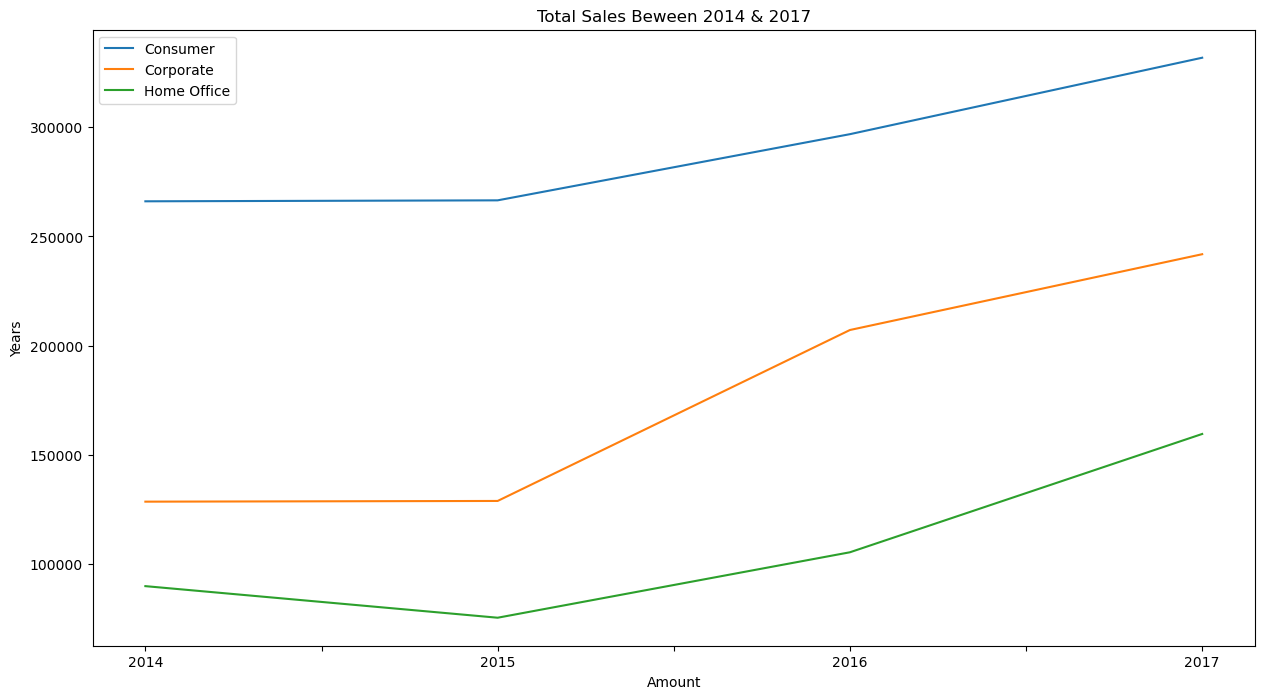

In [35]:
df_anual_sales.plot(
    kind = "line",
    x = "year",
    y = ["Consumer", "Corporate", "Home Office"],
    figsize=(15, 8)
)
plt.xlabel("Amount")
plt.ylabel("Years")
plt.title("Total Sales Beween 2014 & 2017");

In [36]:
## Group by segments and months
anual_sales_profit = sales_profit.groupby(["segment", "year"]).sum()

## split the rows using their index
consumer = anual_sales_profit.loc["Consumer",:].reset_index()
corporate = anual_sales_profit.loc["Corporate",:].reset_index()
home_office = anual_sales_profit.loc["Home Office",:].reset_index()

## Combine the tables
df_anual_profit = pd.concat([consumer["profit"], corporate["profit"], home_office["profit"]],axis=1)

## Rename columns and month names
df_anual_profit.columns= ["Consumer", "Corporate", "Home Office"]
df_anual_profit["year"] = ["2014", "2015", "2016", "2017"]

## Confirm changes
df_anual_profit.set_index("year")

,Consumer,Corporate,Home Office
year,,,
2014,24319.8504,13513.2769,11710.8468
2015,28460.1665,20688.3248,12470.1124
2016,35770.9532,30995.1690,15029.0521
2017,45568.2391,26782.3633,21088.6672


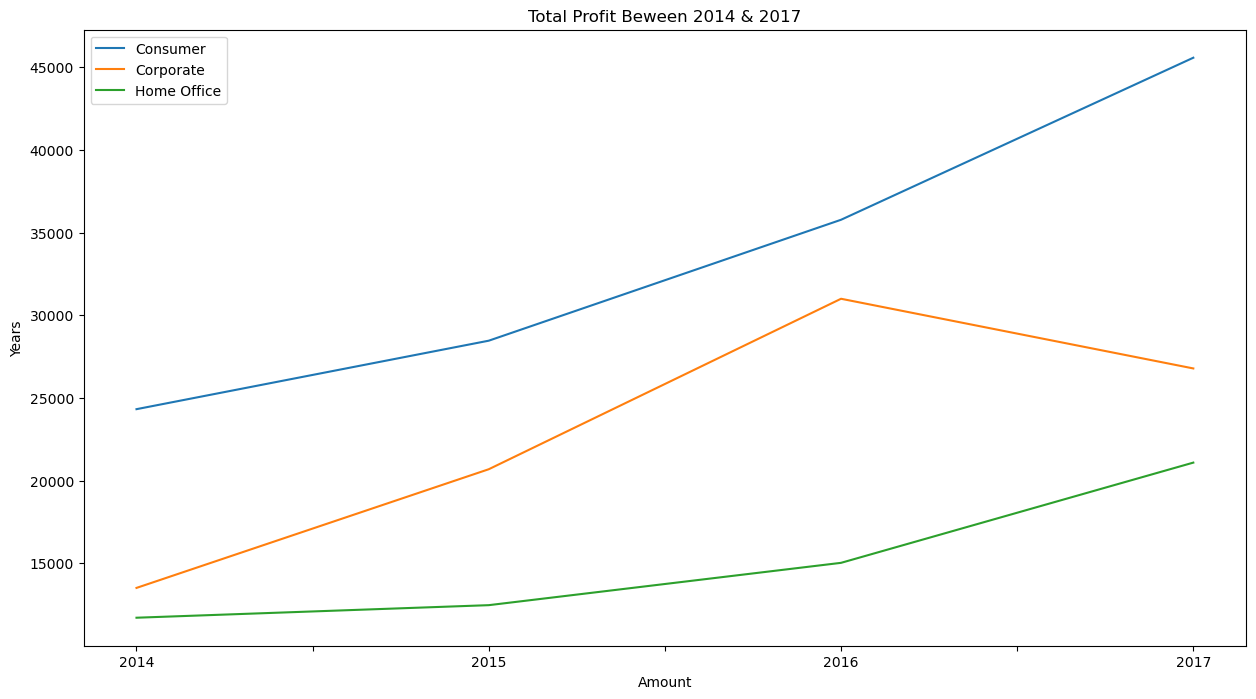

In [37]:
df_anual_profit.plot(
    kind = "line",
    x = "year",
    y = ["Consumer", "Corporate", "Home Office"],
    figsize=(15, 8)
)
plt.xlabel("Amount")
plt.ylabel("Years")
plt.title("Total Profit Beween 2014 & 2017");

Let me plot the two charts side by side for easy comparison

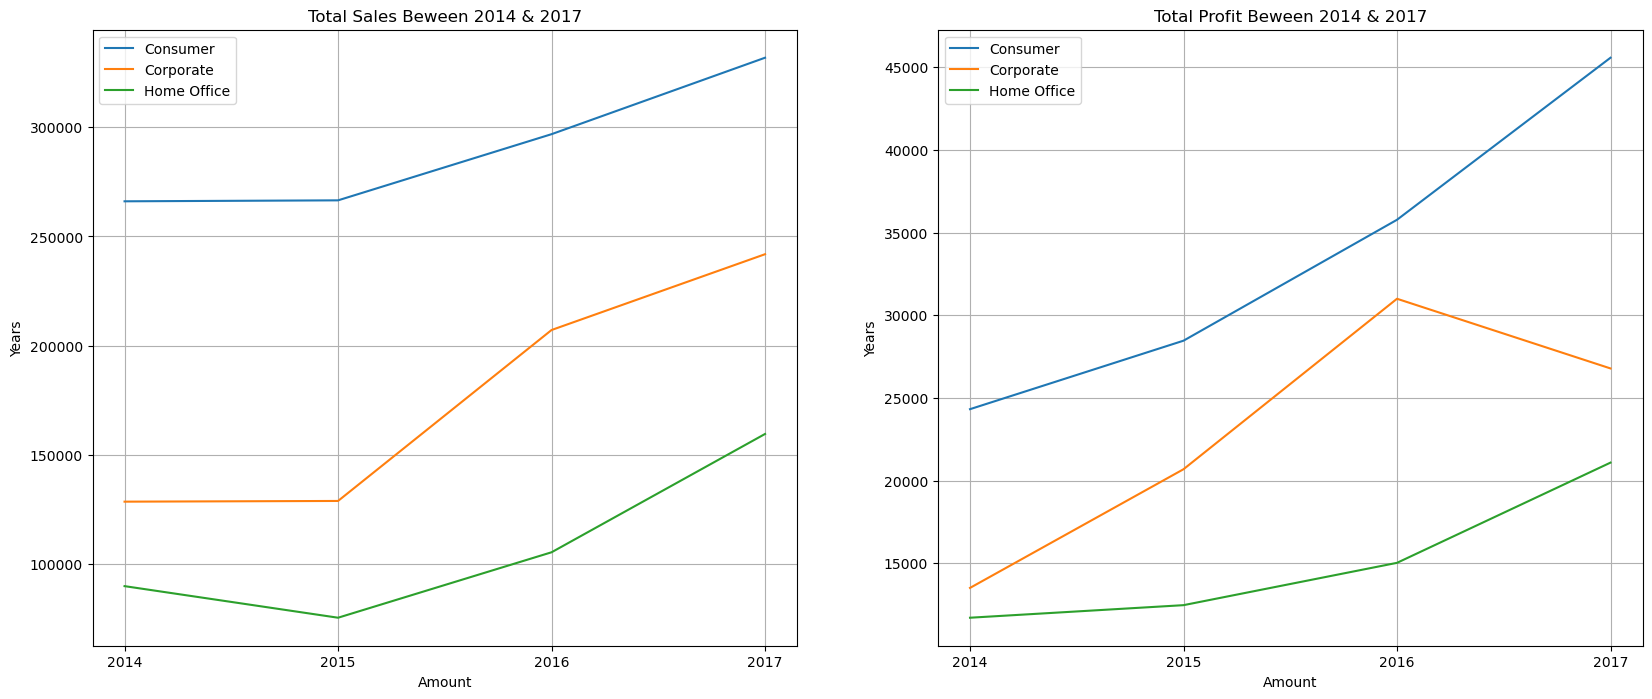

In [38]:
plt.figure(figsize=[20,8])
plt.subplot(1, 2, 1)
plt.plot(
    df_anual_sales["year"],
    df_anual_sales[["Consumer", "Corporate", "Home Office"]],
)
plt.legend(["Consumer", "Corporate", "Home Office"])
plt.grid()
plt.xlabel("Amount")
plt.ylabel("Years")
plt.title("Total Sales Beween 2014 & 2017");

plt.subplot(1, 2, 2)
plt.plot(
    df_anual_profit["year"],
    df_anual_profit[["Consumer", "Corporate", "Home Office"]],
)
plt.legend(["Consumer", "Corporate", "Home Office"])
plt.grid()
plt.xlabel("Amount")
plt.ylabel("Years")
plt.title("Total Profit Beween 2014 & 2017");

Findings: There was a significant change in both sales and profit between 2015 and 2016. These can be summarised in three points

The behaviour of casual buyers is unpredictable. Thus, depending too much on they might be a greater risk

The percentage increase in profit seems to be low when compared with the rate at which sales increased for corporate buyers and even dropped after sales decreased

Although home office buyers still account for the smallest percentage of the buyers, sales increases mean profit increases.

Ask:

How the is purchasing pattern differ for each segment on monthly basis?

Is the any product a segment buy more than the other?

In [39]:
## Calculate the monthly sales for each segment

## Group by segments and months
monthly_sales = sales.groupby(["segment", "month"]).sum()

## split the rows using their index
consumer = monthly_sales.loc["Consumer",:].reset_index()
corporate = monthly_sales.loc["Corporate",:].reset_index()
home_office = monthly_sales.loc["Home Office",:].reset_index()

## Combine the tables
df_combined = pd.concat([consumer["sales"], corporate["sales"], home_office["sales"]],axis=1)

## Rename columns and month names
df_combined.columns= ["Consumer", "Corporate", "Home Office"]
df_combined["month"] = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

## Confirm changes
df_combined.set_index("month")

,Consumer,Corporate,Home Office
month,,,
Jan,50441.2906,26790.3480,17693.1970
Feb,33826.1760,14575.0670,11350.0084
Mar,89174.7070,58239.9132,57590.8686
Apr,54845.1895,49233.1636,33683.7755
May,86932.7144,47289.0323,20807.0650
Jun,82910.1803,40858.5370,28949.9620
Jul,81769.7730,46919.2060,18549.1180
Aug,82319.8063,57529.4477,19194.8090
Sep,185055.9196,74020.2213,48573.8048


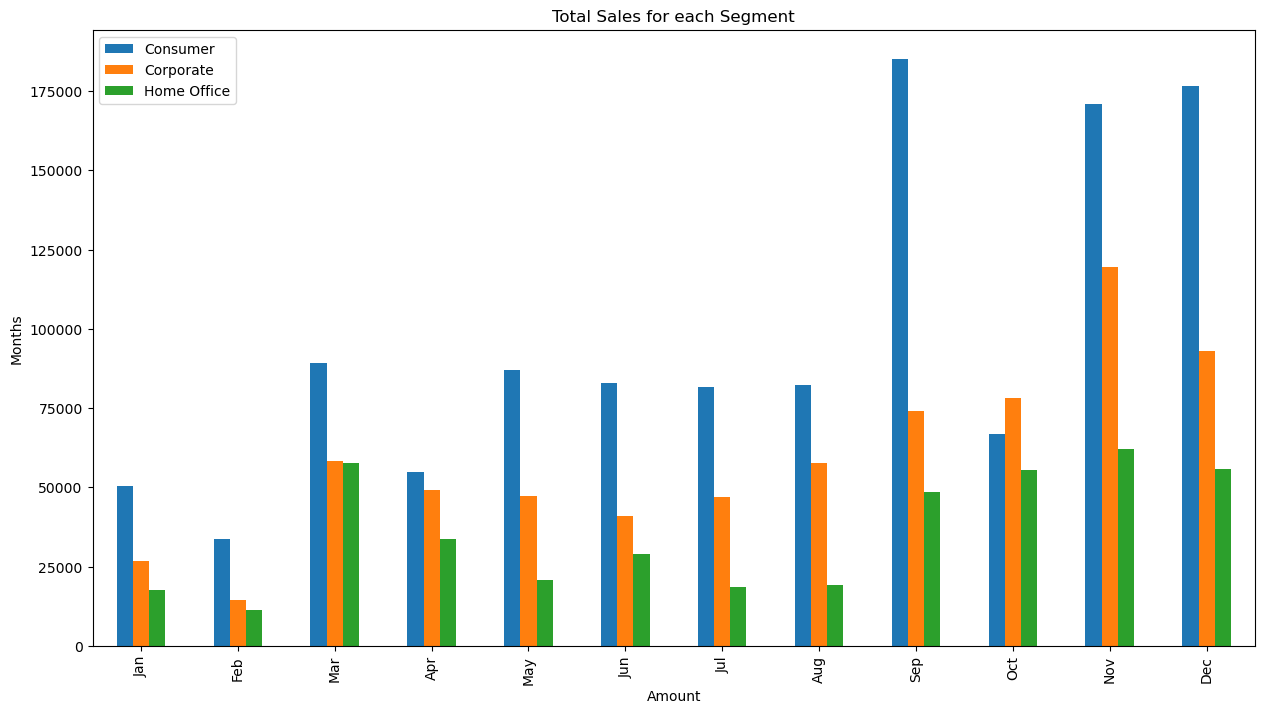

In [40]:
## Visualize. If this return an error message, run the code before it

df_combined.plot(
    kind = "bar",
    x = "month",
    y = ["Consumer", "Corporate", "Home Office"],
    figsize=(15, 8)
)
plt.xlabel("Amount")
plt.ylabel("Months")
plt.title("Total Sales for each Segment");

In [41]:
## Calculate the monthly sales for each segment

## Group by segments and months
monthly_profit = profit.groupby(["segment", "month"]).sum()

## split the rows using their index
consumer = monthly_profit.loc["Consumer",:].reset_index()
corporate = monthly_profit.loc["Corporate",:].reset_index()
home_office = monthly_profit.loc["Home Office",:].reset_index()

## Combine the tables
df_combined = pd.concat([consumer["profit"], corporate["profit"], home_office["profit"]],axis=1)

## Rename columns and month names
df_combined.columns= ["Consumer", "Corporate", "Home Office"]
df_combined["month"] = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

## Confirm changes
df_combined.set_index("month")

,Consumer,Corporate,Home Office
month,,,
Jan,3179.0966,1349.5747,4605.7748
Feb,6668.2667,2545.4077,1080.9363
Mar,18086.1212,7804.2538,2704.3122
Apr,3854.3816,7273.9416,459.1131
May,10746.1024,7831.3823,3833.8231
Jun,11917.5345,4721.3075,4646.9534
Jul,4104.3650,6868.3949,2859.9049
Aug,10264.4166,9519.0652,1993.4566
Sep,24338.3640,6059.1762,6459.9351


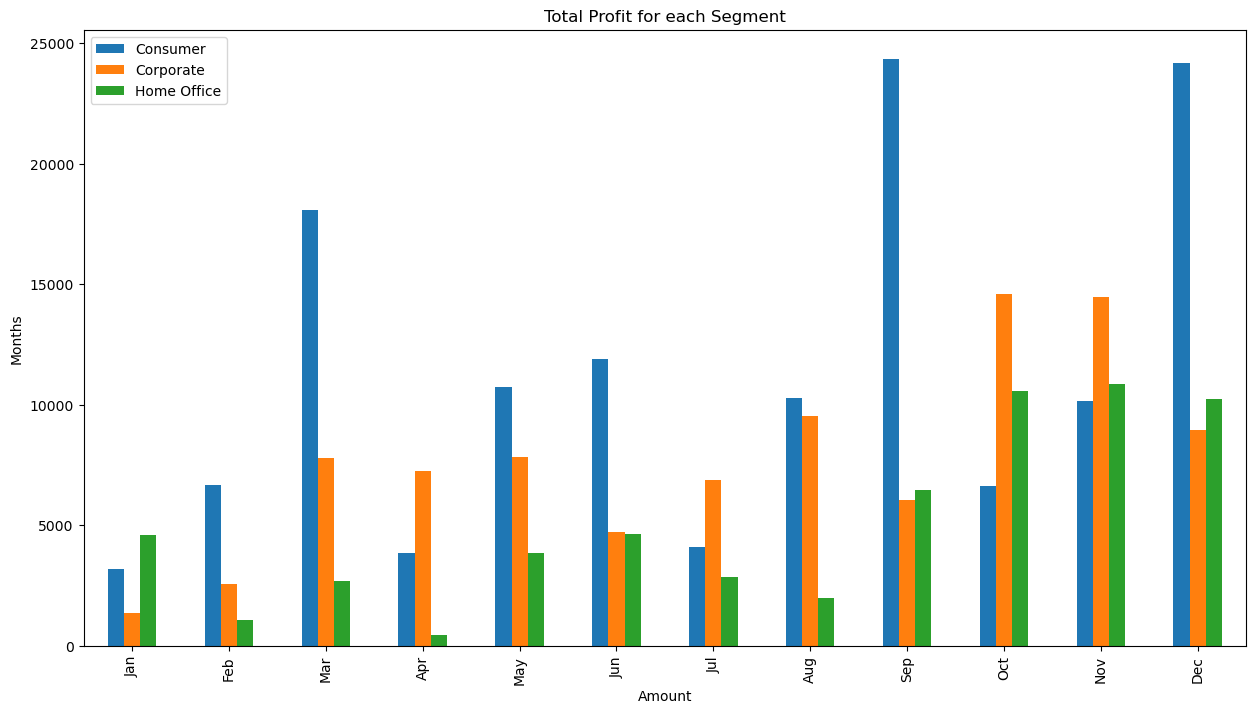

In [42]:
## Visualize. If this return an error message, run the code before it

df_combined.plot(
    kind = "bar",
    x = "month",
    y = ["Consumer", "Corporate", "Home Office"],
    figsize=(15, 8)
)
plt.xlabel("Amount")
plt.ylabel("Months")
plt.title("Total Profit for each Segment");

In [43]:
## Combine the two on a chart

## Group by segments and months
monthly_sales_profit = sales_profit.groupby(["segment", "month"]).sum()

## split the rows using their index
consumer = monthly_sales_profit.loc["Consumer",:].reset_index()
corporate = monthly_sales_profit.loc["Corporate",:].reset_index()
home_office = monthly_sales_profit.loc["Home Office",:].reset_index()

## Combine the tables
df_combined = pd.concat([consumer[["sales", "profit"]], corporate[["sales", "profit"]], home_office[["sales", "profit"]]],axis=1)

## Rename columns and month names
df_combined.columns= ["cons_sales", "cons_profit", "corp_sales", "corp_profit", "home_sales", "home_profit"]
df_combined["month"] = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

## Confirm changes
df_combined.set_index("month")

,cons_sales,cons_profit,corp_sales,corp_profit,home_sales,home_profit
month,,,,,,
Jan,50441.2906,3179.0966,26790.3480,1349.5747,17693.1970,4605.7748
Feb,33826.1760,6668.2667,14575.0670,2545.4077,11350.0084,1080.9363
Mar,89174.7070,18086.1212,58239.9132,7804.2538,57590.8686,2704.3122
Apr,54845.1895,3854.3816,49233.1636,7273.9416,33683.7755,459.1131
May,86932.7144,10746.1024,47289.0323,7831.3823,20807.0650,3833.8231
Jun,82910.1803,11917.5345,40858.5370,4721.3075,28949.9620,4646.9534
Jul,81769.7730,4104.3650,46919.2060,6868.3949,18549.1180,2859.9049
Aug,82319.8063,10264.4166,57529.4477,9519.0652,19194.8090,1993.4566
Sep,185055.9196,24338.3640,74020.2213,6059.1762,48573.8048,6459.9351


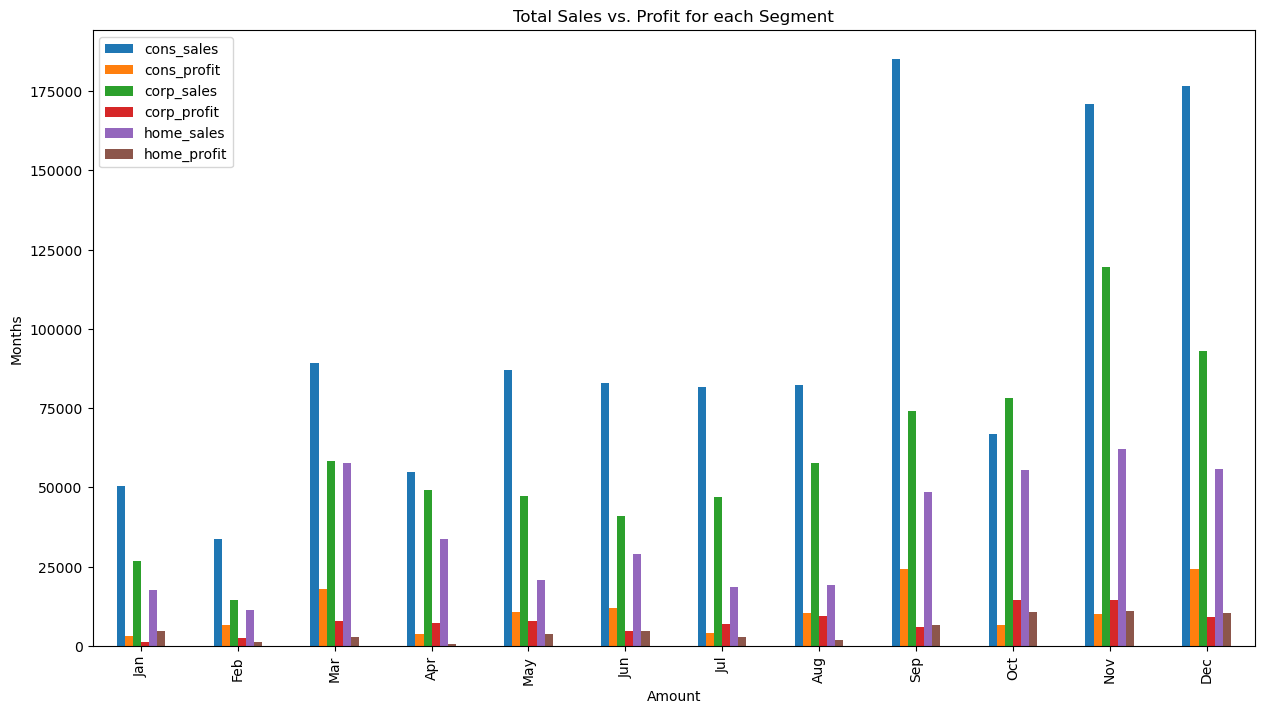

In [44]:
## Visualize. If this return an error message, run the code before it

df_combined.plot(
    kind = "bar",
    x = "month",
    y = ["cons_sales", "cons_profit", "corp_sales", "corp_profit", "home_sales", "home_profit"],
    figsize=(15, 8)
)
plt.xlabel("Amount")
plt.ylabel("Months")
plt.title("Total Sales vs. Profit for each Segment");

Findings:

Casual buyers have been in the lead throughout the month except for October. The drastic change in October will likely be due to them not buying as they wait for giveaways in November (Black Friday) and December. Thus, although there is an increase in total sales and a bit of profit within this period, the per cent increment is not complementary for the two. While both sales and profit increased for corporate and office customers, only sales and not profit increased for casual buyers. We can see that casual buyers only took advantage of the period.

Ask:

For future findings will may what to understand better for example; Normalizing sales for each segment, which product each segment purchase more?

In [45]:
## Group by segments and categoty
categories = df_clean[["segment", "category", "sub_category"]]
df_categories = categories.groupby(["segment", "category"]).count()

## split the rows using their index
consumer = df_categories.loc["Consumer",:].reset_index()
corporate = df_categories.loc["Corporate",:].reset_index()
home_office = df_categories.loc["Home Office",:].reset_index()

## Combine the tables
df_categories = pd.concat([consumer["sub_category"], corporate["sub_category"], home_office["sub_category"]],axis=1)

# ## Rename columns and month names
df_categories.columns= ["Consumer", "Corporate", "Home Office"]
## Normalize the values
df_categories = df_categories / df_categories.sum()
df_categories["category"] = ["Furniture", "Office Supplies", "Technology"]

## Confirm changes
df_categories.set_index("category")

,Consumer,Corporate,Home Office
category,,,
Furniture,0.169516,0.175317,0.165295
Office Supplies,0.636889,0.630159,0.633745
Technology,0.193595,0.194524,0.200960


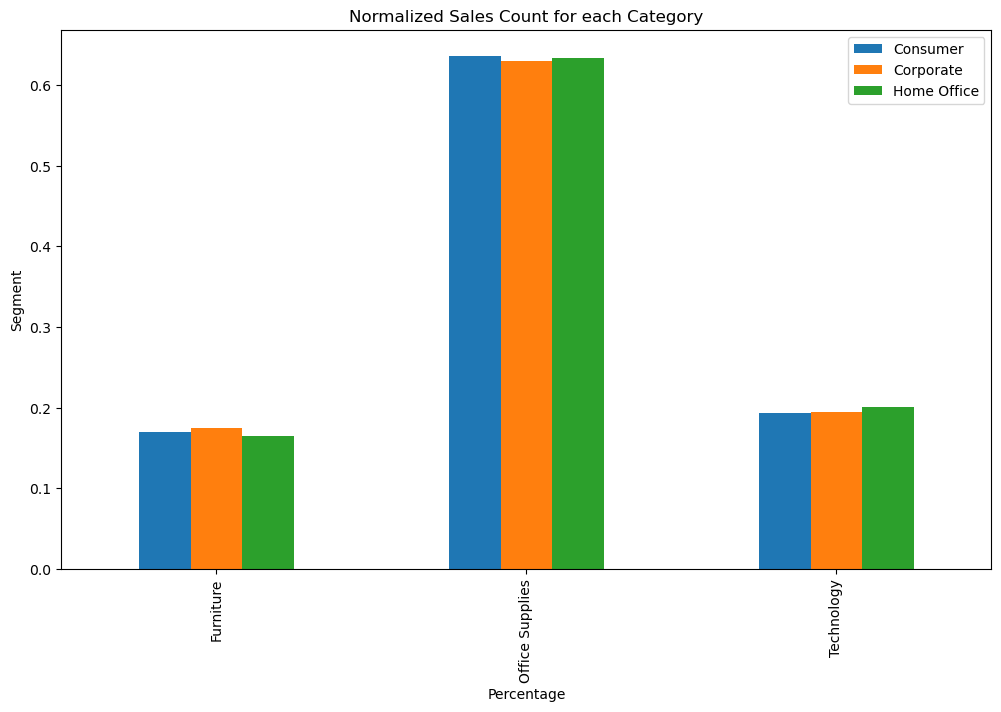

In [46]:
## Visualize. If this return an error message, run the code before it

df_categories.plot(
    kind = "bar",
    x = "category",
    y = ["Consumer", "Corporate", "Home Office"],
    figsize=(12, 7)
)
plt.xlabel("Percentage")
plt.ylabel("Segment")
plt.title("Normalized Sales Count for each Category");

These are normalised values. It does not calculate the total sale for each category for all the segments together; instead, it calculates the percentage of the sale for each category on average; they consume each category at the same proportion with a slight difference. Corporate customers buy more furniture than other items, etc. Knowing this will help in advertisement planning.


Task 3: Critical reflection report

In [48]:
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Write a wrangle function that do the following:

1. Replace spaces / hyphen with underscores and lowercase labels
2. Subset only observations where the profit is greater than 0 and discount is less than 0.5.
3. removing outliers in profit
4. Convert "order_date" and "ship_date" to datetime
5. Calculate the lag time between the "order_date" and the "ship_date"
6. Create separate "year" and "month" columns
7. Drop columns containing low- or high-cardinality categorical values.
8. Drop any columns that would constitute leakage for the target "price_aprox_usd".
9. Drop any columns that would create issues of multicollinearity.
10. Drop extraneous columns.

In [49]:
def wrangle(filepath):
    df = pd.read_csv(filepath, encoding='latin1')
    
    # replace spaces / hyphen with underscores and lowercase labels
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_").replace("-", "_"), inplace=True)

    # Initiate columns to drop
    to_drop = ["row_id", "order_id", "postal_code", "product_id", "customer_id", "customer_name"]
    
    # Subset only observations where the profit is greater than 0 and discount is less than 0.5
    mask_profit = df["profit"] > 0
    mask_discount = df["discount"] < 0.5
    
    # Subset: removing outliers in profit
    lower, higher = df["profit"].quantile([1e-6,0.9])
    mask_outlier = df["profit"].between(lower, higher)
    
    # Subset dateframe using mask
    df = df[mask_profit & mask_discount & mask_outlier]
    
    # Conver "order_date" and "ship_date" to datetime
    df["order_date"] = pd.to_datetime(df["order_date"])

    df["ship_date"] = pd.to_datetime(df["ship_date"])
    
    # Calculate the difference between the "order_date" and the "ship_date"
    df["lag_time"] = (df["ship_date"] - df["order_date"]) / np.timedelta64(1, 'D')
    
    # Create separate year and month columns from order_date
    df["year"] = df["order_date"].dt.year
    df["month"] = df["order_date"].dt.month
    
    # Add to "to_drop columns"
    to_drop = to_drop + ["order_date", "ship_date"]
    
    # Drop categorical values with high or low cardinarlity and add to "to_drop columns"
    to_drop = to_drop + ["city", "product_name", "country"]
    
    # Drop leaky columns
    to_drop = to_drop +["sales"]  
    
    # Drop extraneous columns
    df = df.drop(columns = to_drop)
    
    return df

In [50]:
# Use this cell to test your wrangle function and explore the data
df = wrangle("Superstore.csv")
print(df.shape)
df.head()

(7058, 12)


,ship_mode,segment,state,region,category,sub_category,quantity,discount,profit,lag_time,year,month
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,2,0.0,41.9136,3.0,2016,11
2,Second Class,Corporate,California,West,Office Supplies,Labels,2,0.0,6.8714,4.0,2016,6
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,2,0.2,2.5164,7.0,2015,10
5,Standard Class,Consumer,California,West,Furniture,Furnishings,7,0.0,14.1694,5.0,2014,6
6,Standard Class,Consumer,California,West,Office Supplies,Art,4,0.0,1.9656,5.0,2014,6


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7058 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ship_mode     7058 non-null   object 
 1   segment       7058 non-null   object 
 2   state         7058 non-null   object 
 3   region        7058 non-null   object 
 4   category      7058 non-null   object 
 5   sub_category  7058 non-null   object 
 6   quantity      7058 non-null   int64  
 7   discount      7058 non-null   float64
 8   profit        7058 non-null   float64
 9   lag_time      7058 non-null   float64
 10  year          7058 non-null   int64  
 11  month         7058 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 716.8+ KB


In [52]:
df.describe()

,quantity,discount,profit,lag_time,year,month
count,7058.000000,7058.000000,7058.000000,7058.000000,7058.000000,7058.000000
mean,3.600737,0.084996,18.708219,3.959195,2015.726268,7.803769
std,2.107864,0.099457,20.220495,1.753082,1.124347,3.278816
min,1.000000,0.000000,0.062800,0.000000,2014.000000,1.000000
25%,2.000000,0.000000,4.581600,3.000000,2015.000000,5.000000
50%,3.000000,0.000000,10.444500,4.000000,2016.000000,9.000000
75%,5.000000,0.200000,25.018200,5.000000,2017.000000,11.000000
max,14.000000,0.400000,89.222400,7.000000,2017.000000,12.000000


Create a histogram showing the distribution of storr profit ("profit") in df.

What does the distribution of price look like? Is the data normal, a little skewed, or very skewed?

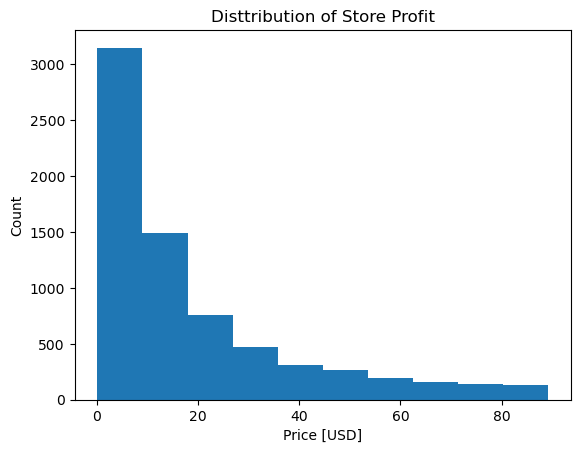

In [53]:
# Plot distribution of price
plt.hist(df["profit"])
plt.xlabel("Price [USD]")
plt.ylabel("Count")
plt.title("Disttribution of Store Profit");

Check for cardinality

In [54]:
df.select_dtypes("object")

,ship_mode,segment,state,region,category,sub_category
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases
2,Second Class,Corporate,California,West,Office Supplies,Labels
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage
5,Standard Class,Consumer,California,West,Furniture,Furnishings
6,Standard Class,Consumer,California,West,Office Supplies,Art
...,...,...,...,...,...,...
9989,Second Class,Consumer,Florida,South,Furniture,Furnishings
9990,Standard Class,Consumer,California,West,Furniture,Furnishings
9991,Standard Class,Consumer,California,West,Technology,Phones
9992,Standard Class,Consumer,California,West,Office Supplies,Paper


In [55]:
df.select_dtypes("object").nunique()

ship_mode        4
segment          3
state           48
region           4
category         3
sub_category    17
dtype: int64

Checking for leakage

In [56]:
sorted(df.columns)

['category',
 'discount',
 'lag_time',
 'month',
 'profit',
 'quantity',
 'region',
 'segment',
 'ship_mode',
 'state',
 'sub_category',
 'year']

Checking for co-linearity in our features

In [57]:
corr = df.select_dtypes("number").drop(columns = ["profit"]).corr()
corr

,quantity,discount,lag_time,year,month
quantity,1.000000,0.021811,0.031944,0.003804,0.016916
discount,0.021811,1.000000,-0.015134,0.001409,0.013870
lag_time,0.031944,-0.015134,1.000000,-0.028745,0.005362
year,0.003804,0.001409,-0.028745,1.000000,-0.010767
month,0.016916,0.013870,0.005362,-0.010767,1.000000


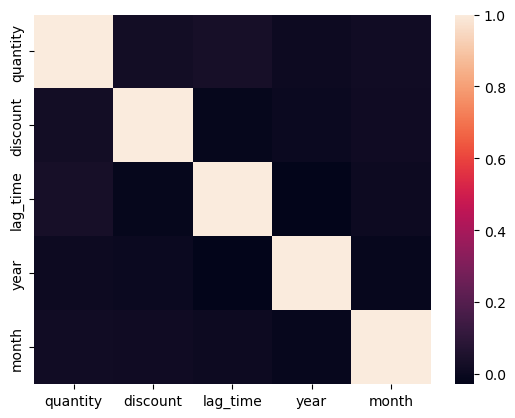

In [60]:
sns.heatmap(corr);

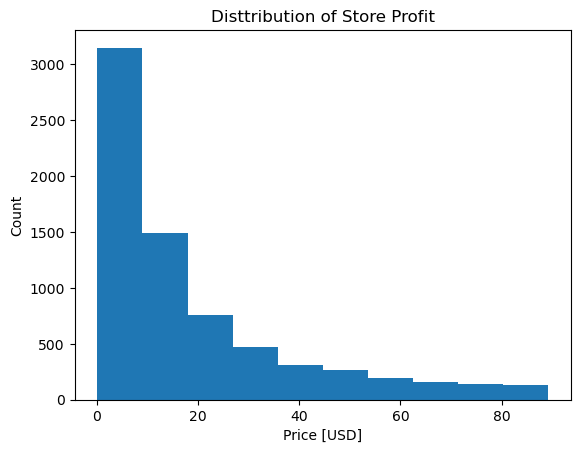

In [61]:
# Plot distribution of price
plt.hist(df["profit"])
plt.xlabel("Price [USD]")
plt.ylabel("Count")
plt.title("Disttribution of Store Profit");

Create a scatter plot that shows apartment price ("price_aprox_usd") as a function of apartment size ("surface_covered_in_m2").

Any relationship between price and area in the data?

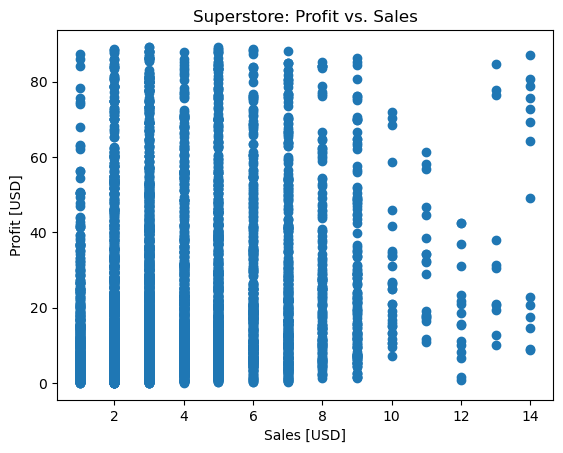

In [62]:
# Plot price vs area
plt.scatter(x = df["quantity"], y = df["profit"])
plt.xlabel("Sales [USD]")
plt.ylabel("Profit [USD]")
plt.title("Superstore: Profit vs. Sales");

Split

Create the feature matrix X and target vector y. Your target is "profit".

In [63]:
# Split data into feature matrix `X` and target vector `y`.
target = "profit"
X = df.drop(columns = [target])
y = df[target]

print(X.shape)
print(y.shape)

(7058, 11)
(7058,)


Divide your data (X and y) into training and test sets using a randomized train-test split. Set test to 20% of the total data. And don't forget to set a random_state for reproducibility.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size = 0.2, random_state = 42
    )

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5646, 11)
y_train shape: (5646,)
X_test shape: (1412, 11)
y_test shape: (1412,)


Build Model

Baseline

In [65]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
baseline_mae = mean_absolute_error(y_train, y_pred_baseline)
print("Mean store profit:", y_mean)
print("Baseline MAE:", baseline_mae)

Mean store profit: 18.780684998228836
Baseline MAE: 15.505115385511127


In [83]:
# Define preprocessors
categorical_features = [col for col in X.columns if X[col].dtype == 'object']
numerical_features = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

Iterate

Create a pipeline named model that contains all the required transformers and fit the model

In [85]:
# Build the model
model = make_pipeline(
    preprocessor,
    LinearRegression()
)

# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['quantity', 'discount',
                                                   'lag_time', 'year',
                                                   'month']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ship_mode', 'segment',
                                                   'state', 'region',
                                                   'category',
                                                   'sub_category'])])),
                ('linearregression', LinearRegression())])

Evaluate

Predict

Use model to generate a Series of predictions for X_test.

In [86]:
y_test_pred = pd.Series(model.predict(X_test))
y_test_pred.head()

0    11.512848
1    15.048453
2    49.743632
3    -2.699446
4     7.845167
dtype: float64

In [87]:
baseline_mae = mean_absolute_error(y_train, y_pred_baseline)
print("Mean store profit:", y_mean)
print("Baseline MAE:", baseline_mae)

Mean store profit: 18.780684998228836
Baseline MAE: 15.505115385511127


In [88]:
mae_train = mean_absolute_error(y_train, y_pred_baseline)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("Baseline MAE:", round(mae_train, 4))
print("Test MAE:", round(mae_test, 4))

Baseline MAE: 15.5051
Test MAE: 12.5338


Communicate Result

In [90]:
# Coefficients and Feature Importances
coefficients = model.named_steps["linearregression"].coef_
features = model.named_steps["columntransformer"].get_feature_names_out()
feat_imp = pd.Series(coefficients, index=features)
feat_imp

num__quantity                  5.733599
num__discount                 -3.975731
num__lag_time                 -0.995550
num__year                     -0.123687
num__month                    -0.178281
                                ...    
cat__sub_category_Paper        2.717543
cat__sub_category_Phones     -10.811445
cat__sub_category_Storage      1.270599
cat__sub_category_Supplies    -7.146606
cat__sub_category_Tables       6.344386
Length: 84, dtype: float64

Create a horizontal bar chart that shows the 10 most influential coefficients for the model.

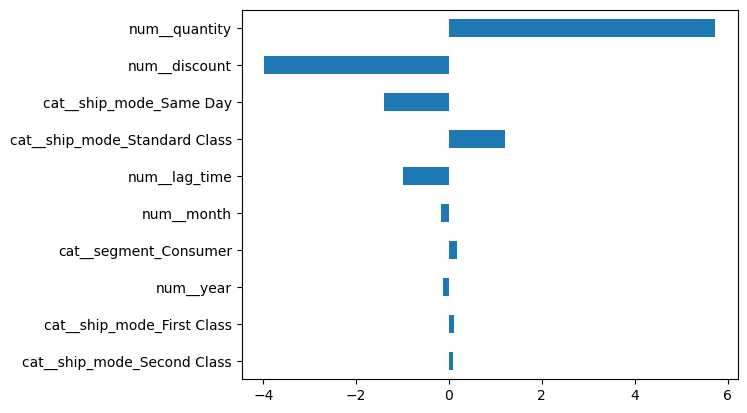

In [91]:
# Create horizontal bar chart
feat_imp.head(10).sort_values(key= abs).plot(kind= "barh")
plt.savefig("top10_feat", dpi=150);

Save model & Reuse Model

In [92]:
# Save model
with open("superstore_model", "wb") as f:
    pickle.dump(model, f)

In [93]:
# Function to load model and make prediction
def make_predictions(data_filepath, model_filepath):
    # Wrangle data
    X_test = wrangle(data_filepath)
    # Drop target if present
    for name in X_test.columns:
        if name == "profit":
            X_test.drop(columns = ["profit"], inplace = True)
    # Load model
    with open(model_filepath, "rb") as f:
        model = pickle.load(f)
    # Generate predictions
    y_test_pred = model.predict(X_test)
    # Put predictions into Series with name "profit", and same index as X_test
    y_test_pred = pd.Series(y_test_pred, index = X_test.index, name = "profit")
    return y_test_pred

Test function

In [94]:
make_predictions("Superstore.csv", "./superstore_model")

0       36.948394
2        6.801702
4        7.245053
5       28.986770
6       10.927363
          ...    
9989    12.486770
9990    15.286118
9991    22.258489
9992    21.969508
9993    21.262705
Name: profit, Length: 7058, dtype: float64